In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import os

In [12]:
RE_SPACE = re.compile(r'[\s]+')

In [13]:
fpath = "../test_data/test1"

In [14]:
head1 = "# hostname;interval;timestamp;CPU;%user;%nice;%system;%iowait;%steal;%idle"
head2 = "# hostname;interval;timestamp;kbmemfree;kbavail;kbmemused;%memused;kbbuffers;kbcached;kbcommit;%commit;kbactive;kbinact;kbdirty"

In [15]:
test = 'test1'

In [16]:
data = None
with open(fpath+"/" + test + "_h", 'r') as f:
    data = f.read()

In [27]:
CPU, MEM = data.split(head2)

In [28]:
MEM = head2+MEM

In [36]:
c_df = pd.DataFrame([x.split(';') for x in CPU.split('\n')])
new_header = c_df.iloc[0] #grab the first row for the header
c_df = c_df[1:-1] #take the data less the header row
c_df.columns = new_header #set the header row as the df header

In [37]:
c_df

,# hostname,interval,timestamp,CPU,%user,%nice,%system,%iowait,%steal,%idle
1,vui-2,1,2021-12-02 01:06:28 UTC,-1,0.23,0.00,0.19,0.00,0.00,99.58
2,vui-2,1,2021-12-02 01:06:29 UTC,-1,0.13,0.00,0.29,0.00,0.00,99.58
3,vui-2,1,2021-12-02 01:06:30 UTC,-1,0.19,0.00,0.25,0.00,0.00,99.56
4,vui-2,1,2021-12-02 01:06:31 UTC,-1,0.25,0.00,0.36,0.00,0.00,99.39
5,vui-2,1,2021-12-02 01:06:32 UTC,-1,0.19,0.00,0.21,0.00,0.00,99.60
...,...,...,...,...,...,...,...,...,...,...
311,vui-2,1,2021-12-02 01:11:38 UTC,-1,0.19,0.00,0.50,0.00,0.00,99.31
312,vui-2,1,2021-12-02 01:11:39 UTC,-1,0.19,0.00,0.31,0.00,0.00,99.50
313,vui-2,1,2021-12-02 01:11:40 UTC,-1,0.27,0.00,0.25,0.00,0.00,99.48
314,vui-2,1,2021-12-02 01:11:41 UTC,-1,0.21,0.00,0.27,0.00,0.00,99.52


In [38]:
m_df = pd.DataFrame([x.split(';') for x in MEM.split('\n')])
new_header = m_df.iloc[0] #grab the first row for the header
m_df = m_df[1:-1] #take the data less the header row
m_df.columns = new_header #set the header row as the df header

In [39]:
m_df

,# hostname,interval,timestamp,kbmemfree,kbavail,kbmemused,%memused,kbbuffers,kbcached,kbcommit,%commit,kbactive,kbinact,kbdirty
1,vui-2,1,2021-12-02 01:06:28 UTC,186021576,190140884,4245884,2.16,137996,3738520,7693148,3.91,5812440,1579872,560
2,vui-2,1,2021-12-02 01:06:29 UTC,186021536,190140844,4245852,2.16,137996,3738552,7693148,3.91,5812440,1579872,592
3,vui-2,1,2021-12-02 01:06:30 UTC,186019296,190138728,4247880,2.16,137996,3738580,7698468,3.92,5818620,1579932,720
4,vui-2,1,2021-12-02 01:06:31 UTC,186018260,190137692,4248880,2.16,137996,3738608,7698468,3.92,5818756,1579932,748
5,vui-2,1,2021-12-02 01:06:32 UTC,186017776,190137324,4248820,2.16,137996,3738640,7693184,3.91,5819900,1579992,792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,vui-2,1,2021-12-02 01:11:38 UTC,185989148,190119532,4258456,2.17,138092,3748196,7578088,3.85,5823580,1588972,1272
312,vui-2,1,2021-12-02 01:11:39 UTC,185989292,190119676,4258468,2.17,138096,3748228,7578088,3.85,5823692,1588972,1324
313,vui-2,1,2021-12-02 01:11:40 UTC,185989264,190119708,4258420,2.17,138096,3748256,7578088,3.85,5824100,1589032,1352
314,vui-2,1,2021-12-02 01:11:41 UTC,185989588,190120032,4258200,2.17,138096,3748284,7578088,3.85,5823724,1589032,1380


In [45]:
c_df["%idle"] = pd.to_numeric(c_df["%idle"], downcast="float")
c_df['usage'] = 100-c_df['%idle']

In [46]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 1 to 315
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   # hostname  315 non-null    object 
 1   interval    315 non-null    object 
 2   timestamp   315 non-null    object 
 3   CPU         315 non-null    object 
 4   %user       315 non-null    object 
 5   %nice       315 non-null    object 
 6   %system     315 non-null    object 
 7   %iowait     315 non-null    object 
 8   %steal      315 non-null    object 
 9   %idle       315 non-null    float32
 10  usage       315 non-null    float32
dtypes: float32(2), object(9)
memory usage: 24.7+ KB


<AxesSubplot:>

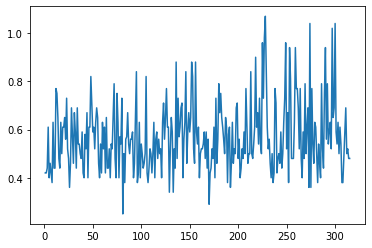

In [55]:
c_df['usage'].plot()

In [51]:
m_df["kbmemused"] = pd.to_numeric(m_df["kbmemused"], downcast="float")
m_df['memused'] = m_df['kbmemused']/(1024*1024)

<AxesSubplot:>

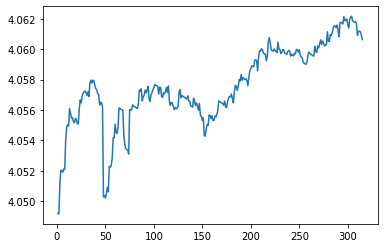

In [54]:
m_df['memused'].plot()